# ECSE415 - Into to Computer Vision
## Assignment 4
### Alexander Harris - 260688155

## 1 - Data Acquisition

In [1]:
import cv2
import numpy as np
import os
import math
from matplotlib import pyplot as plt

In [2]:
def plotFigures(images):
    """
    Plots images from list in grid.
    
    images: list of images
    title: title for each subplot
    params: specific arguments to add to title
    """
    for k, v in images.items():
        grid_len = math.ceil(math.sqrt(len(v)))
        plt.figure(figsize=(30, 30))
        for i, image in enumerate(v):
            plt.subplot(grid_len, grid_len, i+1), plt.imshow(image, 'gray')
            plt.title('{} - #{}'.format(k, i+1)), plt.axis('off')
        plt.show()

In [12]:
def extract_face(img, lbp_face):
    faces = []
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detect = lbp_face.detectMultiScale(img, 1.1, 4)
    for (x, y, w, h) in detect:
        face = img[y:y+h, x:x+w]
        face = cv2.resize(face, (90,90))
        faces.append(face)
    return faces[0]

In [13]:
#Import training images and crop around faces
train_path = './dataset/train/'
train_classes = os.listdir(train_path)
lbp_face_cascade = cv2.CascadeClassifier(os.path.join(cv2.data.haarcascades, 'haarcascade_frontalface_default.xml'))

train_faces = {}
for train_class in train_classes:
    filenames = os.listdir(train_path + train_class + '/')
    faces = []
    for i, file in enumerate(filenames):
        img = cv2.imread('{}{}/{}'.format(train_path, train_class, file))
        face = extract_face(img, lbp_face_cascade)
        faces.append(face)
    train_faces[train_class] = faces

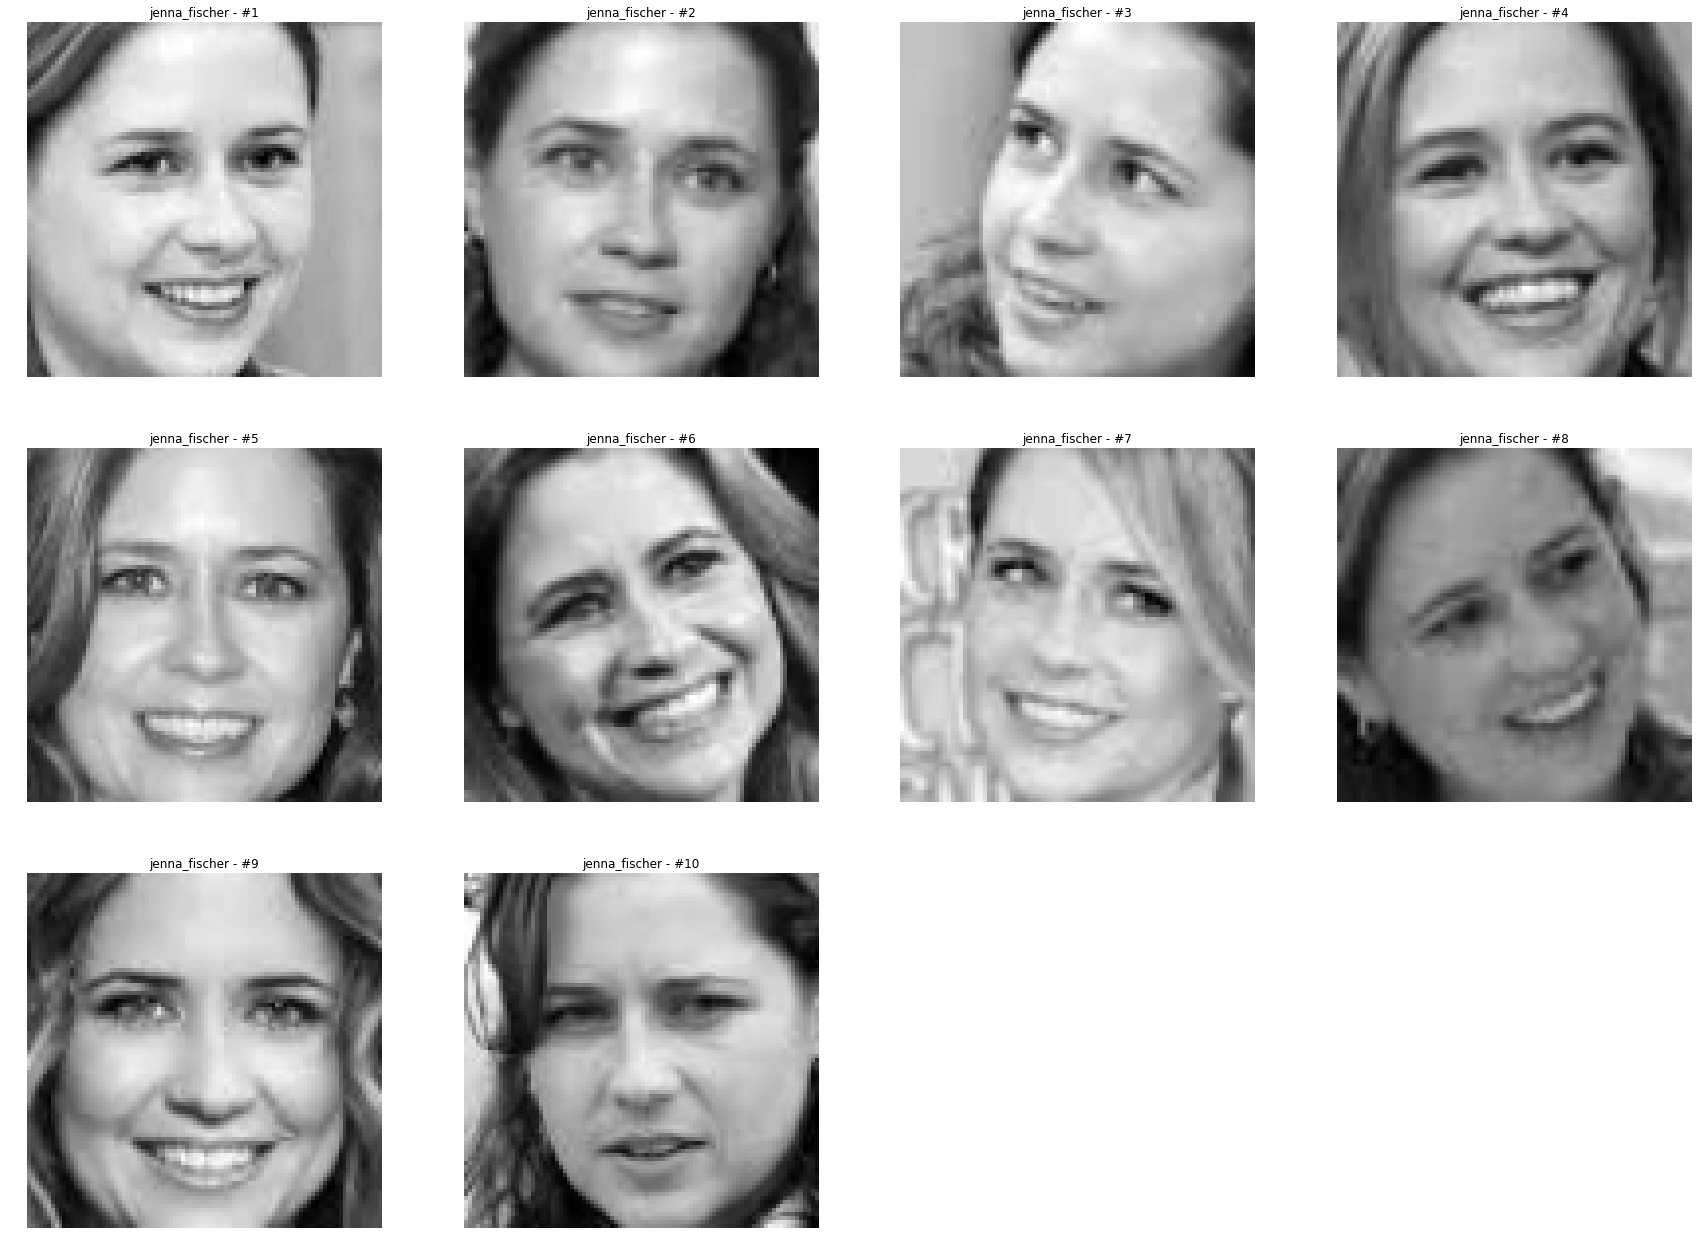

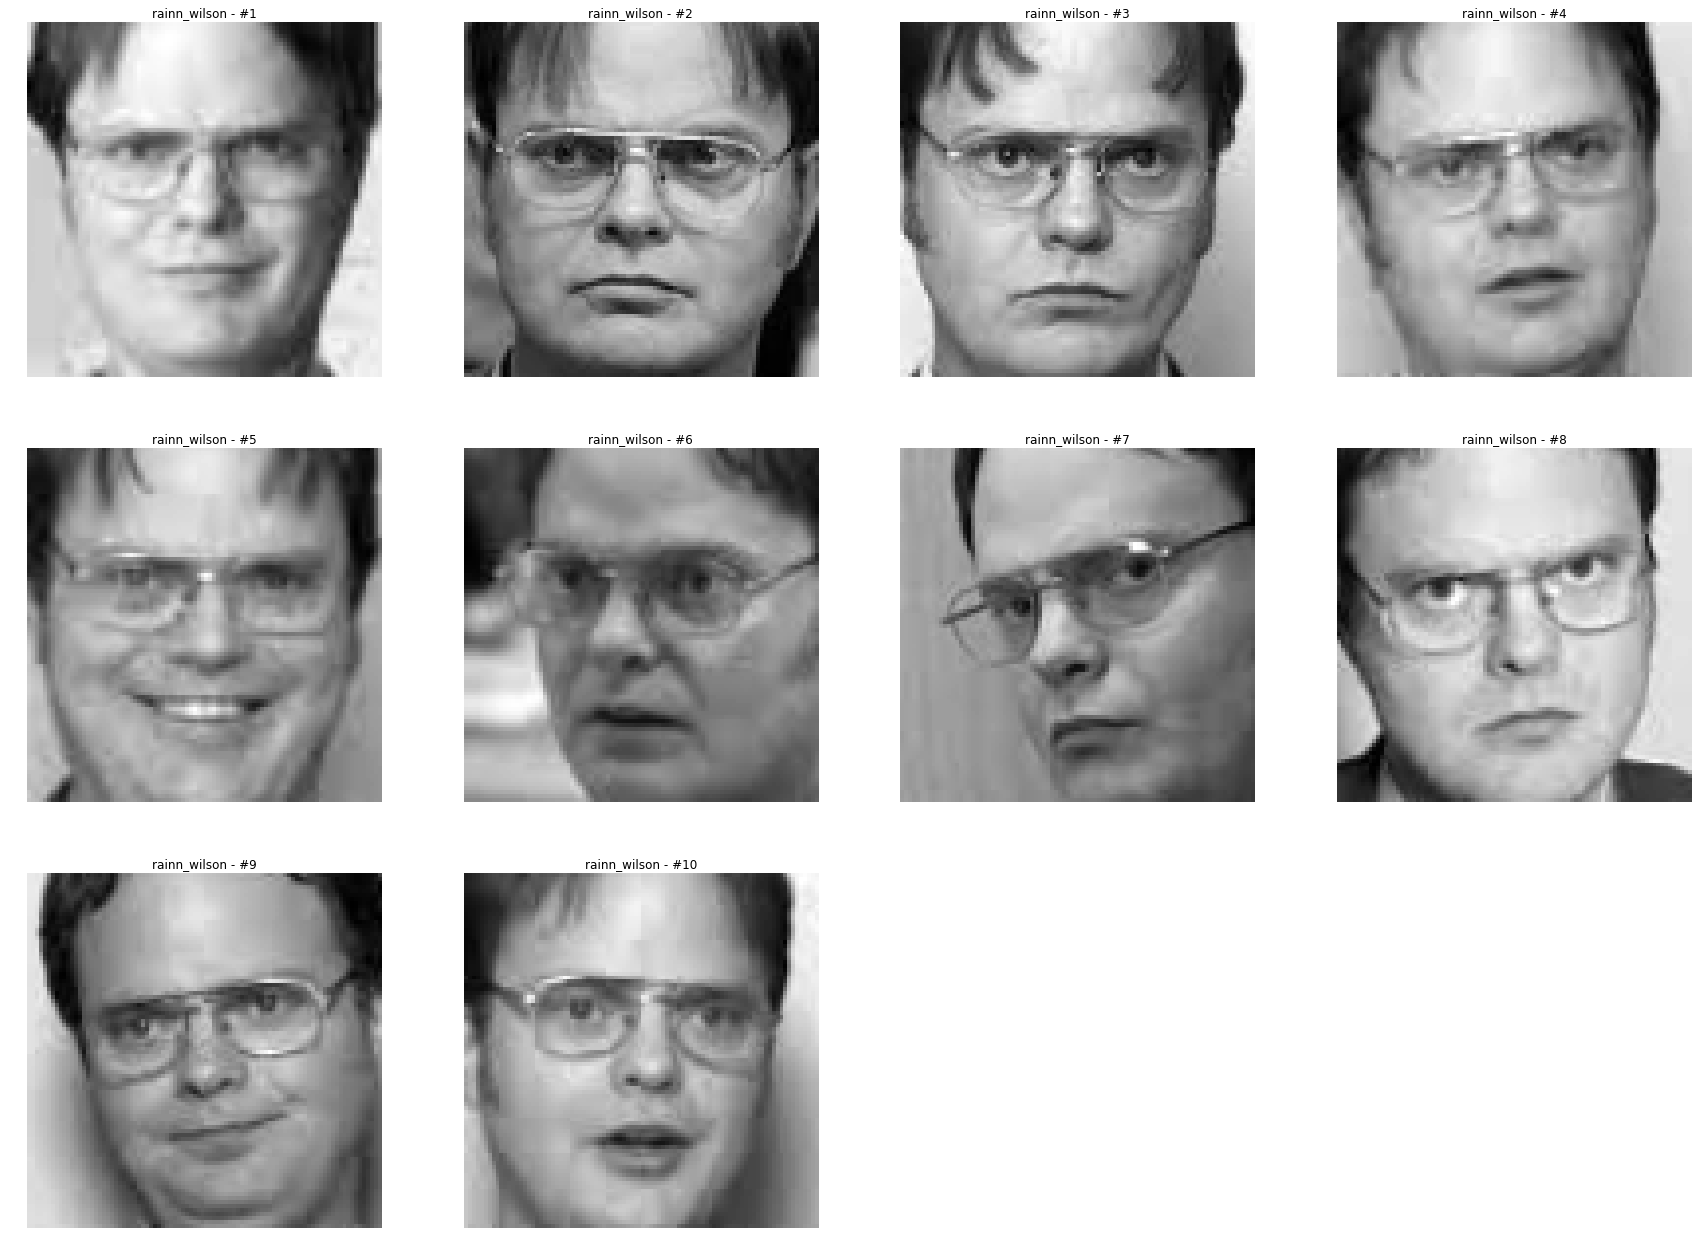

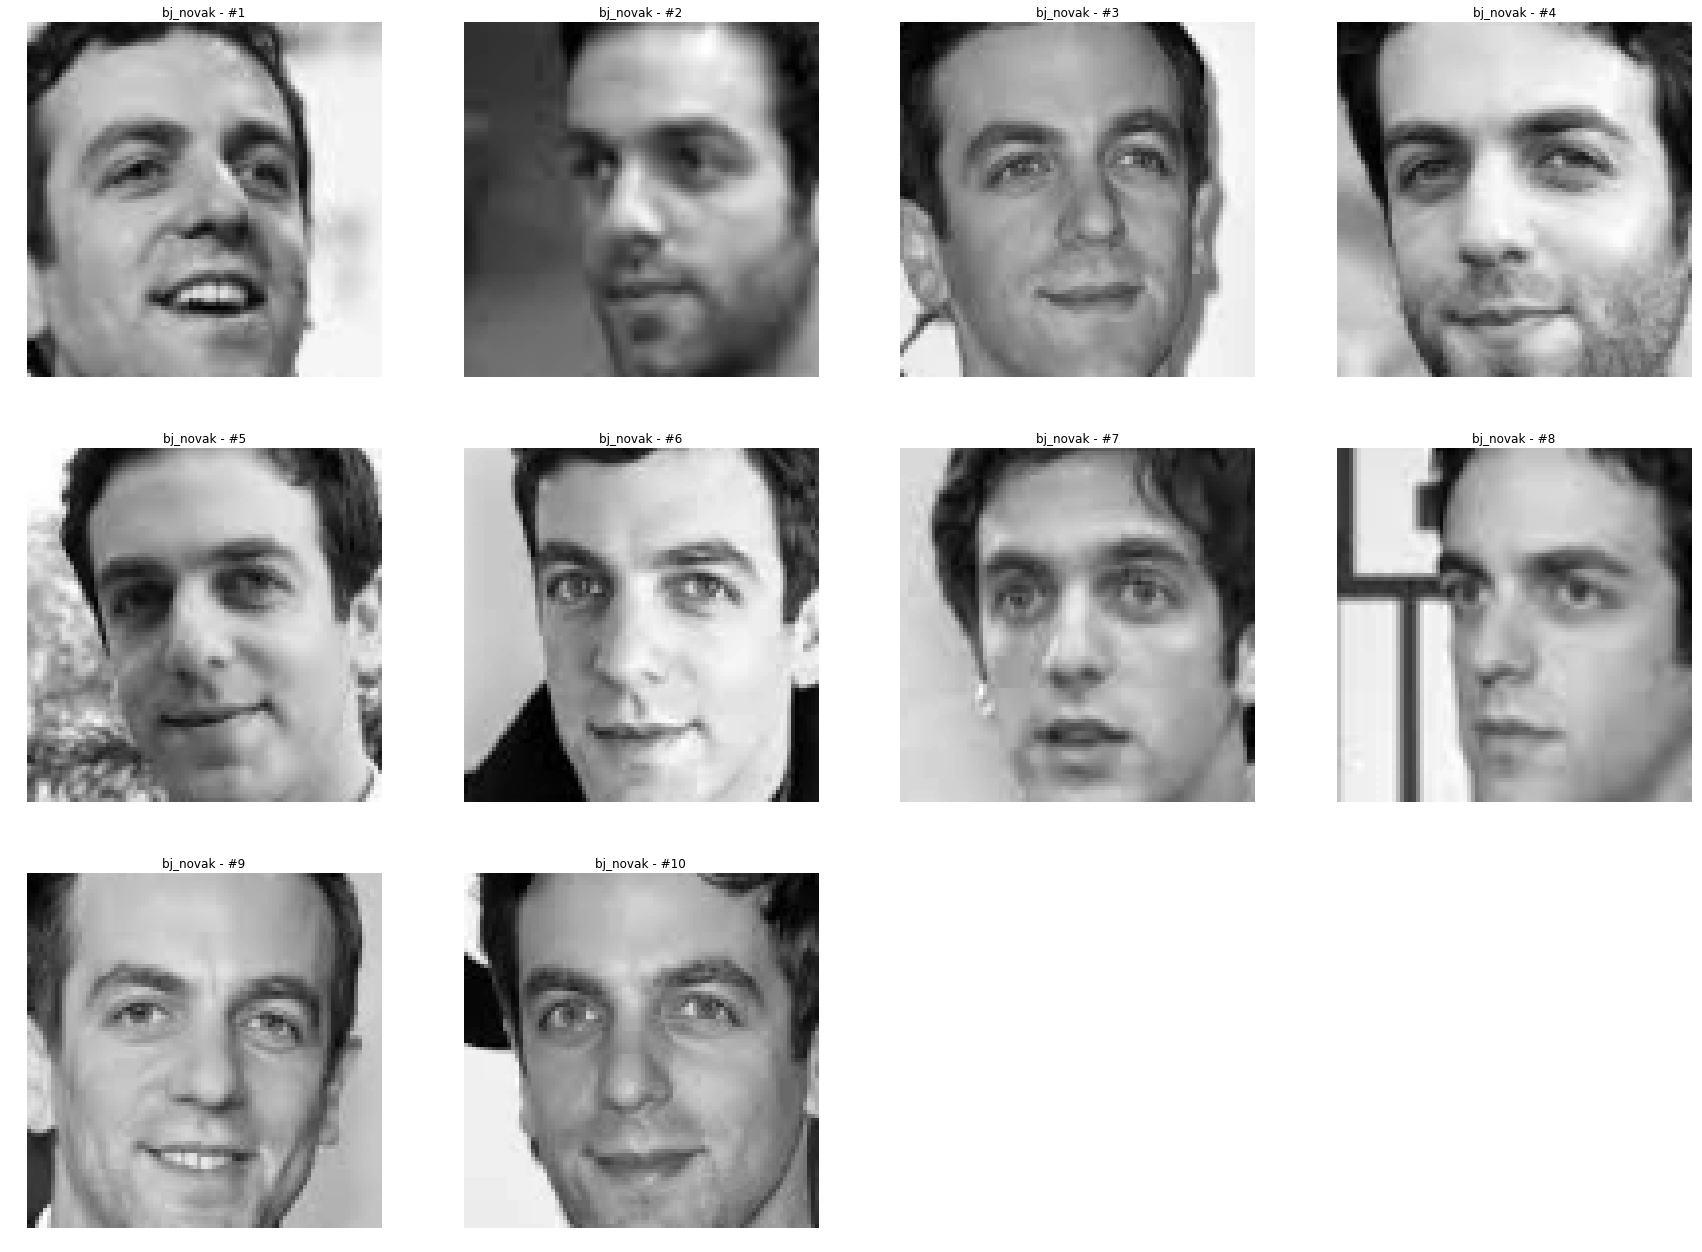

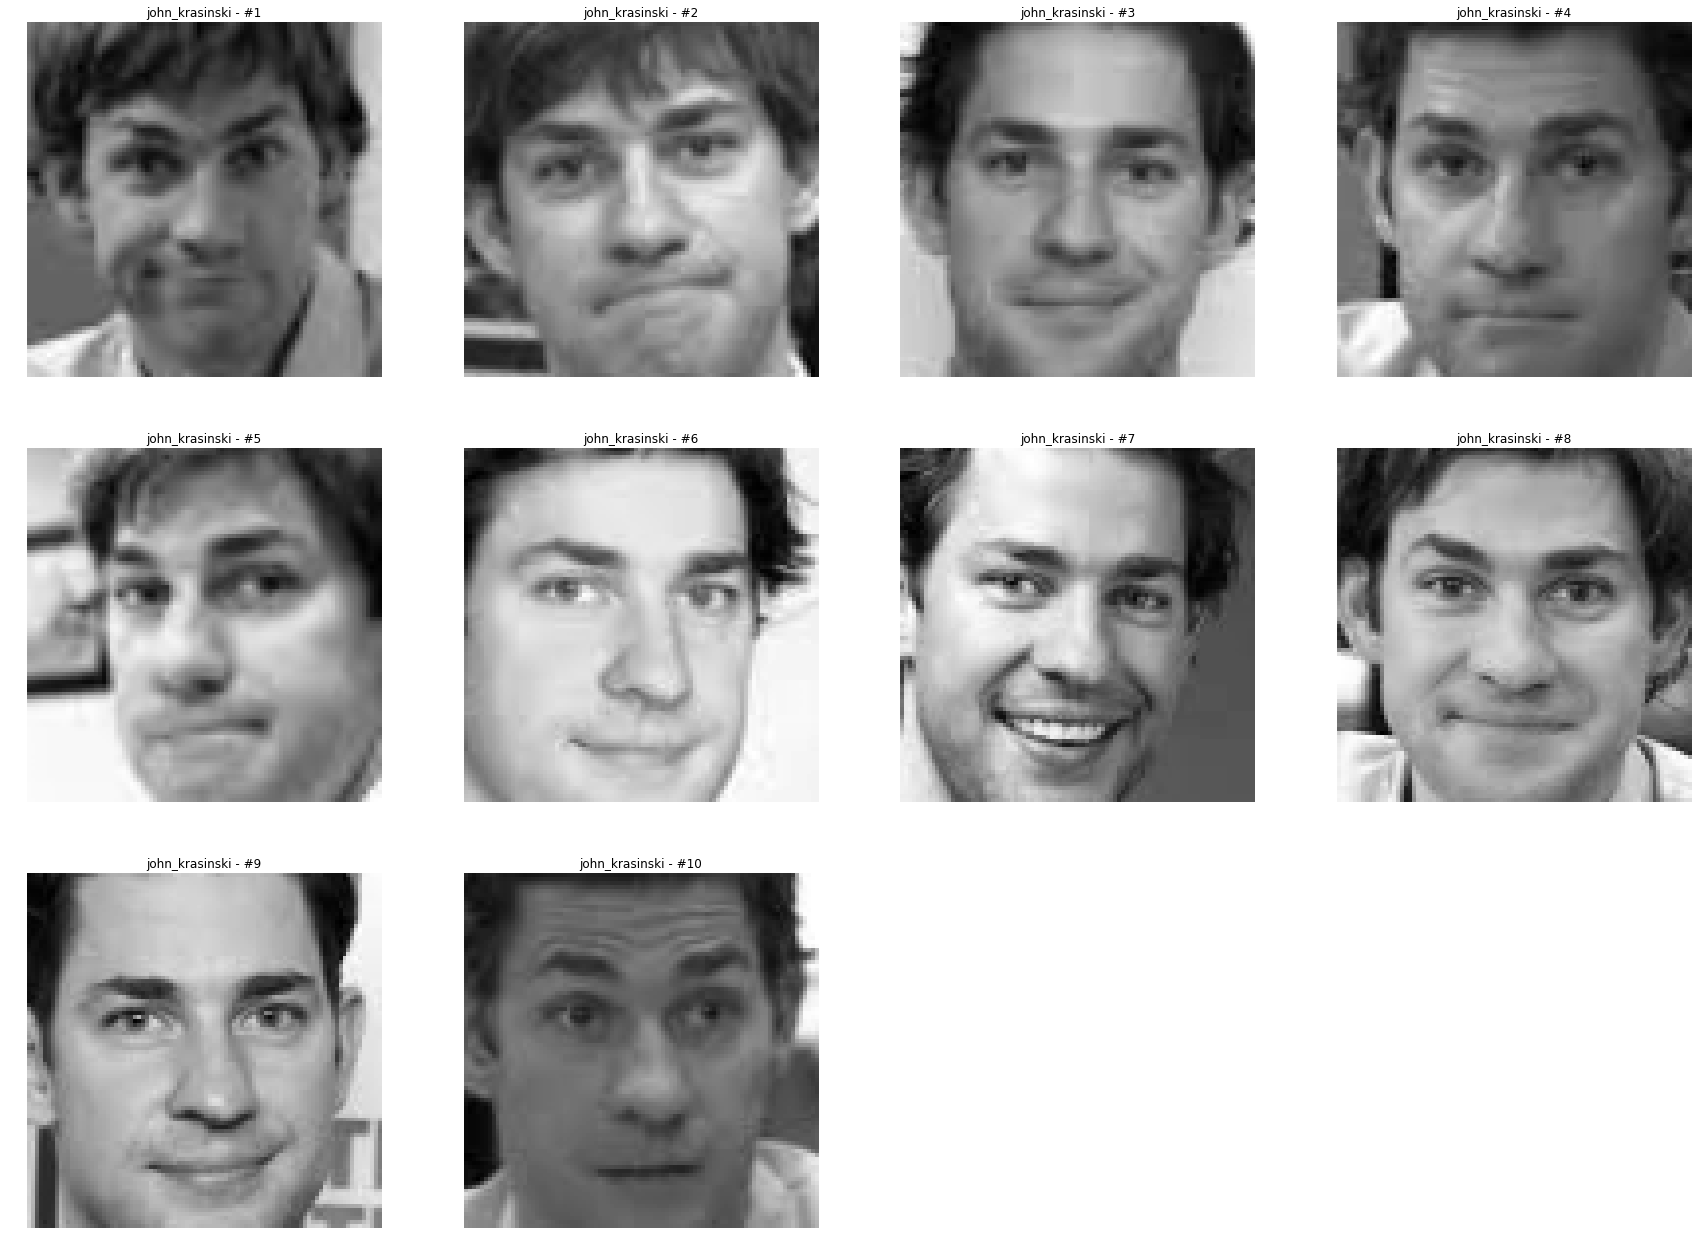

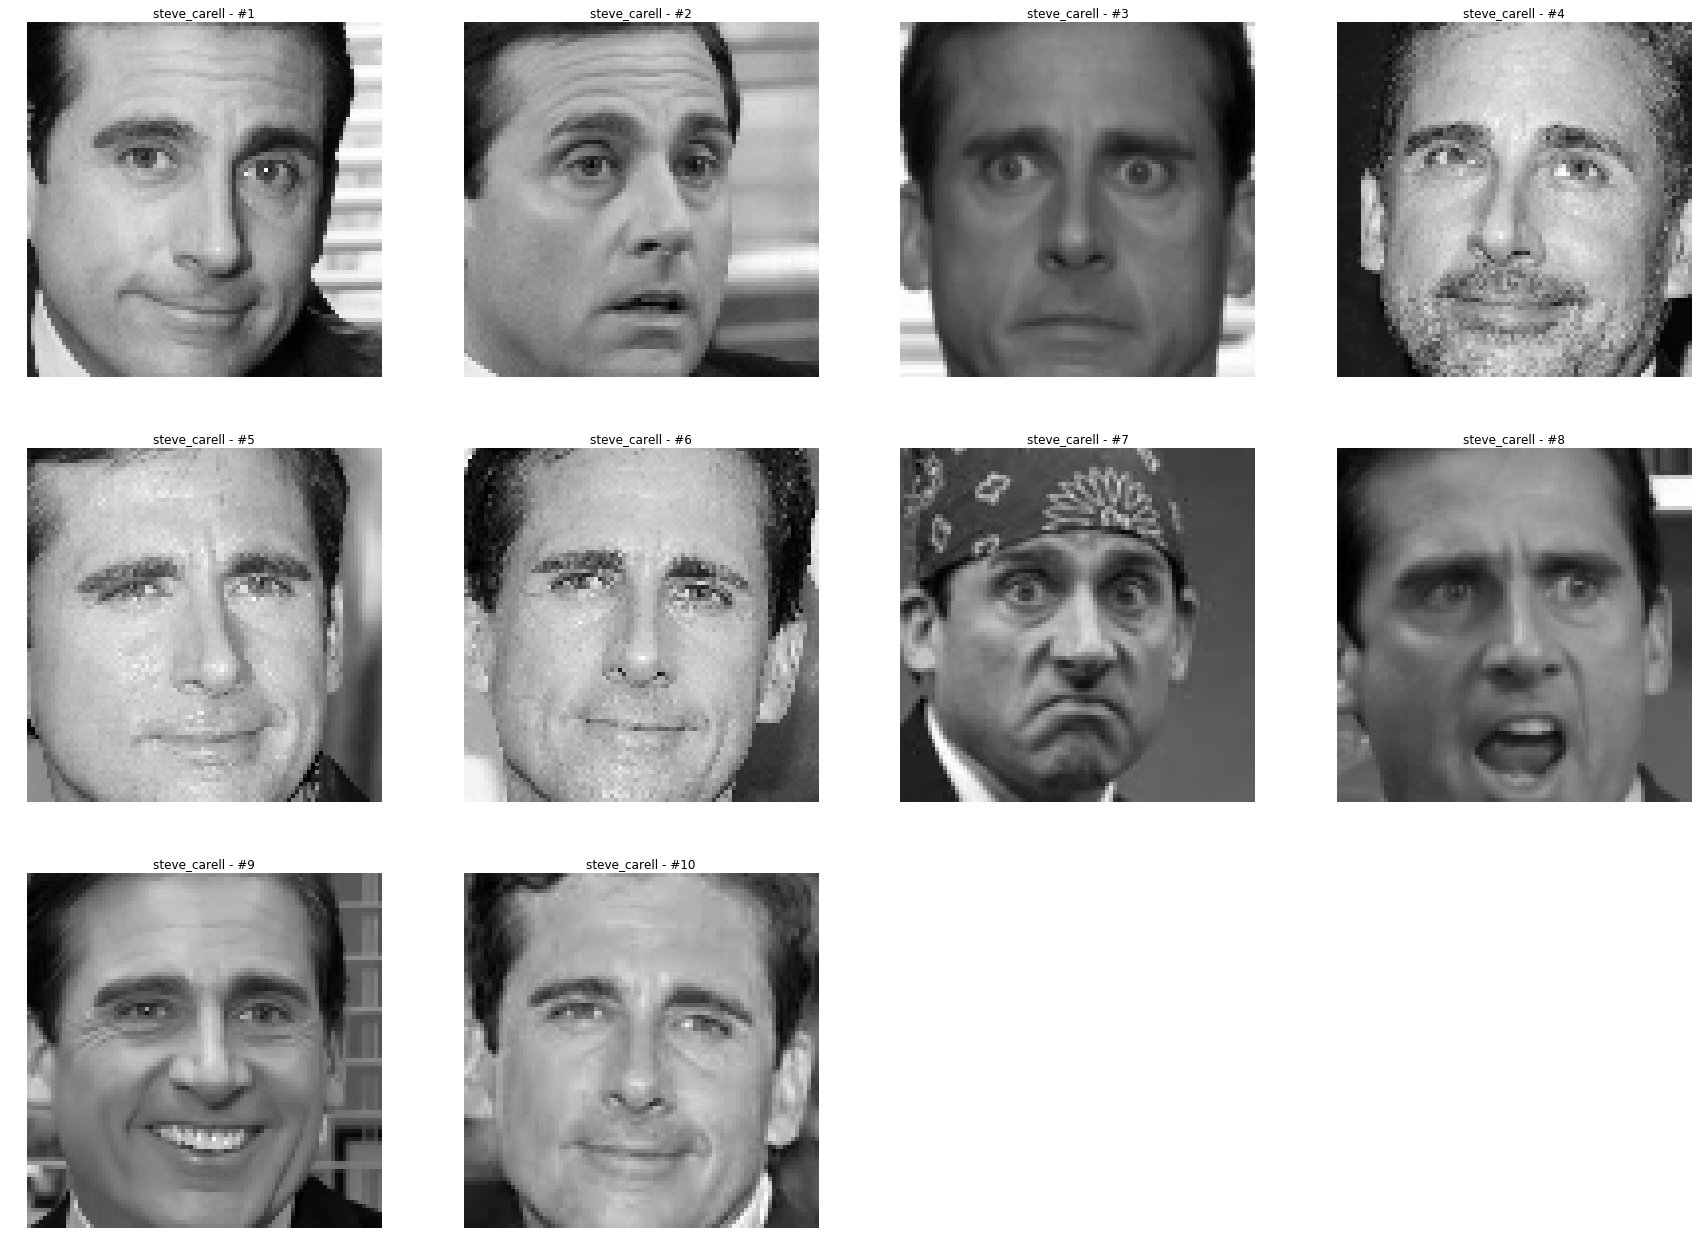

In [14]:
plotFigures(train_faces)